In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from RateTraining import *

In [3]:
p = create_default_params_rate()
p['net_size'] = 300

In [4]:
def gen_rand_stim(p, on, off):
    N = p['net_size']
    dt = p['dt']
    timesteps = int(p['total_time']/dt)
    
    stim = np.zeros((N, timesteps))
    for row in range(N):
        rstim = 2 * sp.stats.uniform.rvs(0, 1) - 1 # random stim weight from -1, 1
        stim[row][int(on/dt):int(off/dt)] = rstim
    return stim

In [5]:
def gen_sine_targets(p): 
    N = p['net_size']
    dt = p['dt']
    timesteps = int(p['total_time']/dt)
    
    targets = np.zeros((N, timesteps))
    for i in range(N):
        A = sp.stats.uniform.rvs() + 0.5
        t0 = sp.stats.uniform.rvs() * 2000
        t1 = sp.stats.uniform.rvs() * 1500 + 500
        x = np.linspace(0, p['total_time'], timesteps)
        targets[i] = A * np.sin(2 * np.pi * (x - t0)/t1)
    return targets

In [6]:
def gen_saw_targs(p):
    N = p['net_size']
    dt = p['dt']
    timesteps = int(p['total_time']/dt)

    targets = np.zeros((N, timesteps))
    t = np.linspace(0, p['total_time'], timesteps)
    for i in range(N):
        A = sp.stats.uniform.rvs() + 0.5
        t0 = sp.stats.uniform.rvs() * 2 * np.pi
        t1 = sp.stats.uniform.rvs() * 1000 + 500
        targets[i] = A * sp.signal.sawtooth(2 * np.pi * (t - t0)/t1, 0.5)
    
    return targets

In [7]:
stargs = gen_saw_targs(p)

In [8]:
stim = gen_rand_stim(p, 0, 10)

In [9]:
targs = gen_sine_targets(p)

In [10]:
np.shape(targs)

(300, 2000)

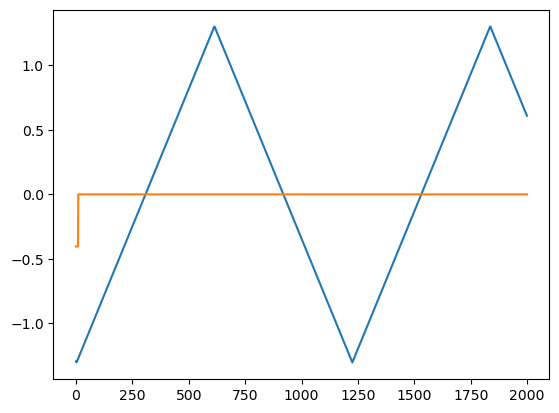

In [11]:
plt.plot(stargs[1])
plt.plot(stim[1])

In [12]:
net = RateTraining(p)
net.nloop = 100

In [13]:
net.train(stim, stargs, np.zeros((net.N, int(net.T/net.dt))))

In [14]:
xr, hxr = net.run(stim)

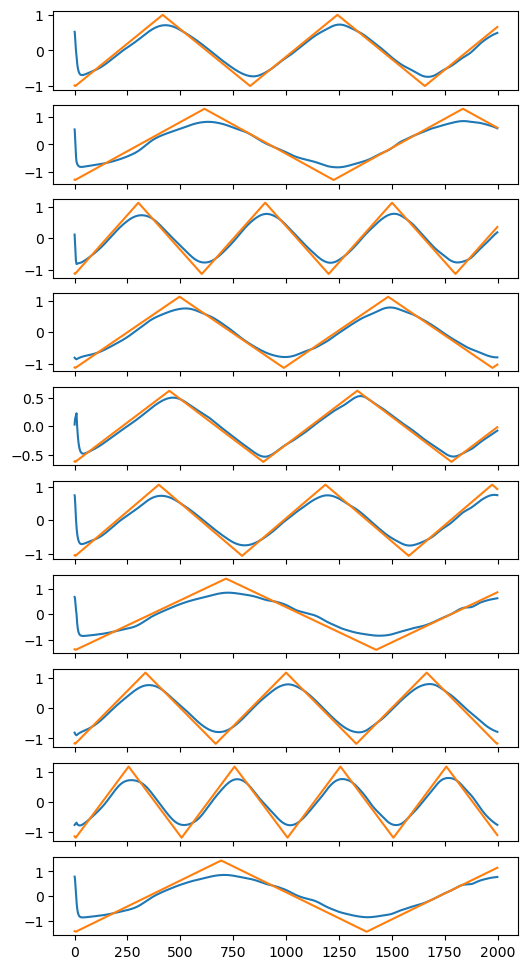

In [15]:
n_plot = 10
nloop = net.nloop
timesteps = int(net.run_time / net.dt)

fig, axs = plt.subplots(n_plot, 1, figsize = (6, 12), sharex = True)
for i in range(n_plot):
    axs[i].plot(hxr[i])
    axs[i].plot(stargs[i])
    #axs[i].plot(stim[i])

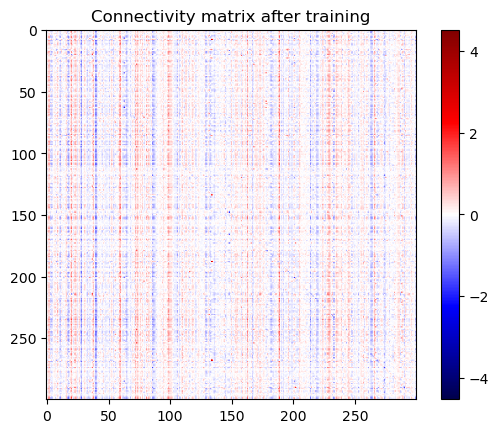

In [16]:
m = max(-1*np.min(net.W_trained), np.max(net.W_trained))

plt.imshow(net.W_trained, cmap=plt.get_cmap('seismic'), vmin = -m, vmax = m)
plt.title("Connectivity matrix after training")
plt.colorbar()

c:\Users\lab\AppData\Local\miniconda3\envs\rnns\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\lab\AppData\Local\miniconda3\envs\rnns\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


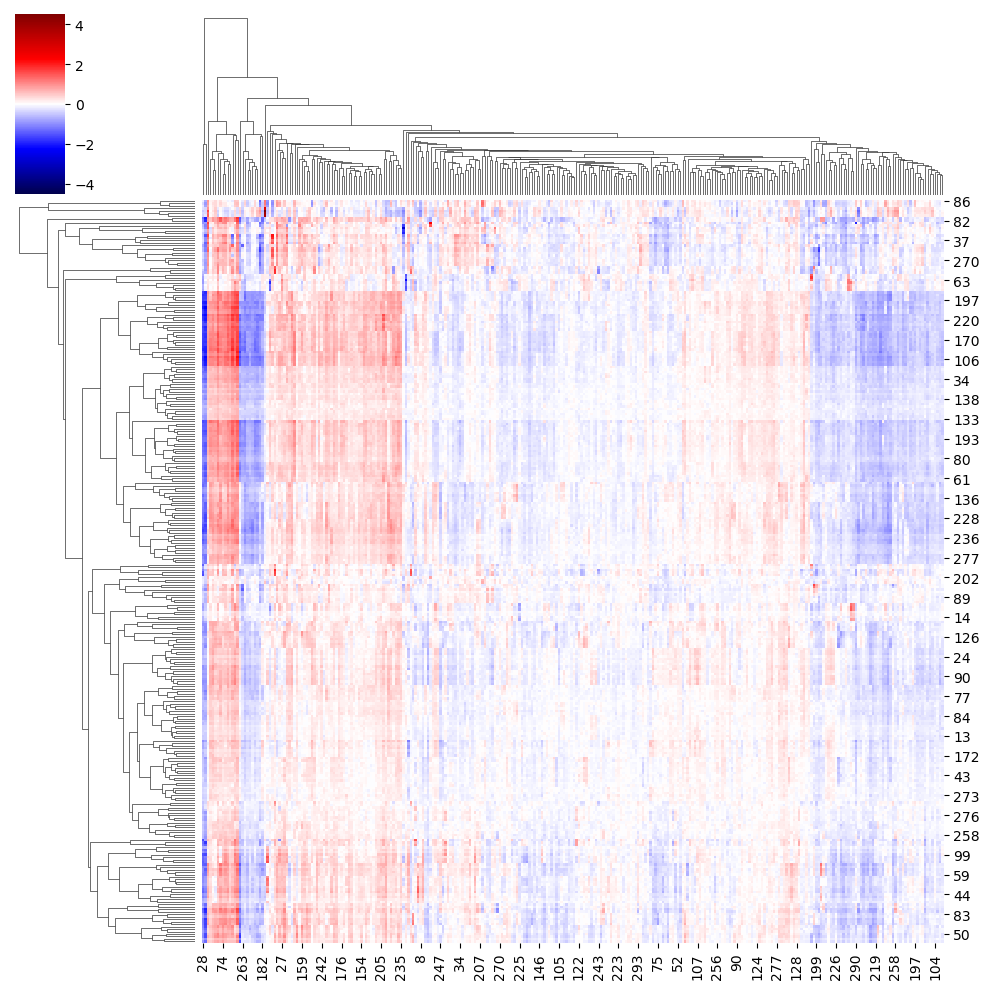

In [17]:
sns.clustermap(net.W_trained, cmap=plt.get_cmap('seismic'), vmin = -m, vmax = m)